# Here's what we're going to do on missing value treatment:

### 1) Take a first look at the data
### 2) See how many missing data points we have
### 3) Figure out why the data is missing
### 4) Drop missing values
### 5) Filling in missing values

### Take a first look at the data
#### We will use a python library called pandas which is a datastructure and data analysis tool. More on pandas in the A11 course
#### Few other libraries we will use are seaborn, matplotlib for visualisation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

### load the data

In [2]:
data = pd.read_csv("data/scraped_data.csv")

In [3]:
data.dtypes

name                         object
url                          object
born                         object
teams                        object
first_class.average          object
first_class.balls_faced      object
first_class.boundaries       object
first_class.catches_taken     int64
first_class.fifties          object
first_class.highest          object
first_class.hundreds         object
first_class.inns             object
first_class.matches           int64
first_class.not_outs         object
first_class.runs             object
first_class.sixes            object
first_class.strike_rate      object
first_class.stumps            int64
dtype: object

In [4]:
data.head()

,name,url,born,teams,first_class.average,first_class.balls_faced,first_class.boundaries,first_class.catches_taken,first_class.fifties,first_class.highest,first_class.hundreds,first_class.inns,first_class.matches,first_class.not_outs,first_class.runs,first_class.sixes,first_class.strike_rate,first_class.stumps
0,Abhisek Banerjee,http://www.espncricinfo.com/ci/content/player/...,"May 18, 1984, Durgapur","Bengal,",23.75,122,14,2,1,68,0,4,4,0,95,0,77.86,0
1,Reagan Pinto,http://www.espncricinfo.com/ci/content/player/...,"September 21, 1991, Bombay (now Mumbai), Mahar...",Goa,32.55,2772,159,11,7,154,3,47,31,4,1400,10,50.50,0
2,Anupam Patel,http://www.espncricinfo.com/ci/content/player/...,"May 1, 1985, Jamshedpur, Bihar",Gujarat,-,0,0,0,0,0*,0,1,2,1,0,0,-,0
3,Utkarsh Patel,http://www.espncricinfo.com/ci/content/player/...,"October 11, 1987, Paradi, Gujarat",Baroda,20.75,321,21,3,1,53,0,10,7,2,166,2,51.71,0
4,Penta Rao,http://www.espncricinfo.com/ci/content/player/...,"May 10, 1985, Vishakapatnam",Services,34.50,314,14,0,1,89,0,5,3,1,138,0,43.94,0


In [5]:
dataCopy = data.copy()
dataCopy = dataCopy.replace('-', np.NaN)

In [6]:
dataCopy.head()

,name,url,born,teams,first_class.average,first_class.balls_faced,first_class.boundaries,first_class.catches_taken,first_class.fifties,first_class.highest,first_class.hundreds,first_class.inns,first_class.matches,first_class.not_outs,first_class.runs,first_class.sixes,first_class.strike_rate,first_class.stumps
0,Abhisek Banerjee,http://www.espncricinfo.com/ci/content/player/...,"May 18, 1984, Durgapur","Bengal,",23.75,122,14,2,1,68,0,4,4,0,95,0,77.86,0
1,Reagan Pinto,http://www.espncricinfo.com/ci/content/player/...,"September 21, 1991, Bombay (now Mumbai), Mahar...",Goa,32.55,2772,159,11,7,154,3,47,31,4,1400,10,50.50,0
2,Anupam Patel,http://www.espncricinfo.com/ci/content/player/...,"May 1, 1985, Jamshedpur, Bihar",Gujarat,NaN,0,0,0,0,0*,0,1,2,1,0,0,NaN,0
3,Utkarsh Patel,http://www.espncricinfo.com/ci/content/player/...,"October 11, 1987, Paradi, Gujarat",Baroda,20.75,321,21,3,1,53,0,10,7,2,166,2,51.71,0
4,Penta Rao,http://www.espncricinfo.com/ci/content/player/...,"May 10, 1985, Vishakapatnam",Services,34.50,314,14,0,1,89,0,5,3,1,138,0,43.94,0


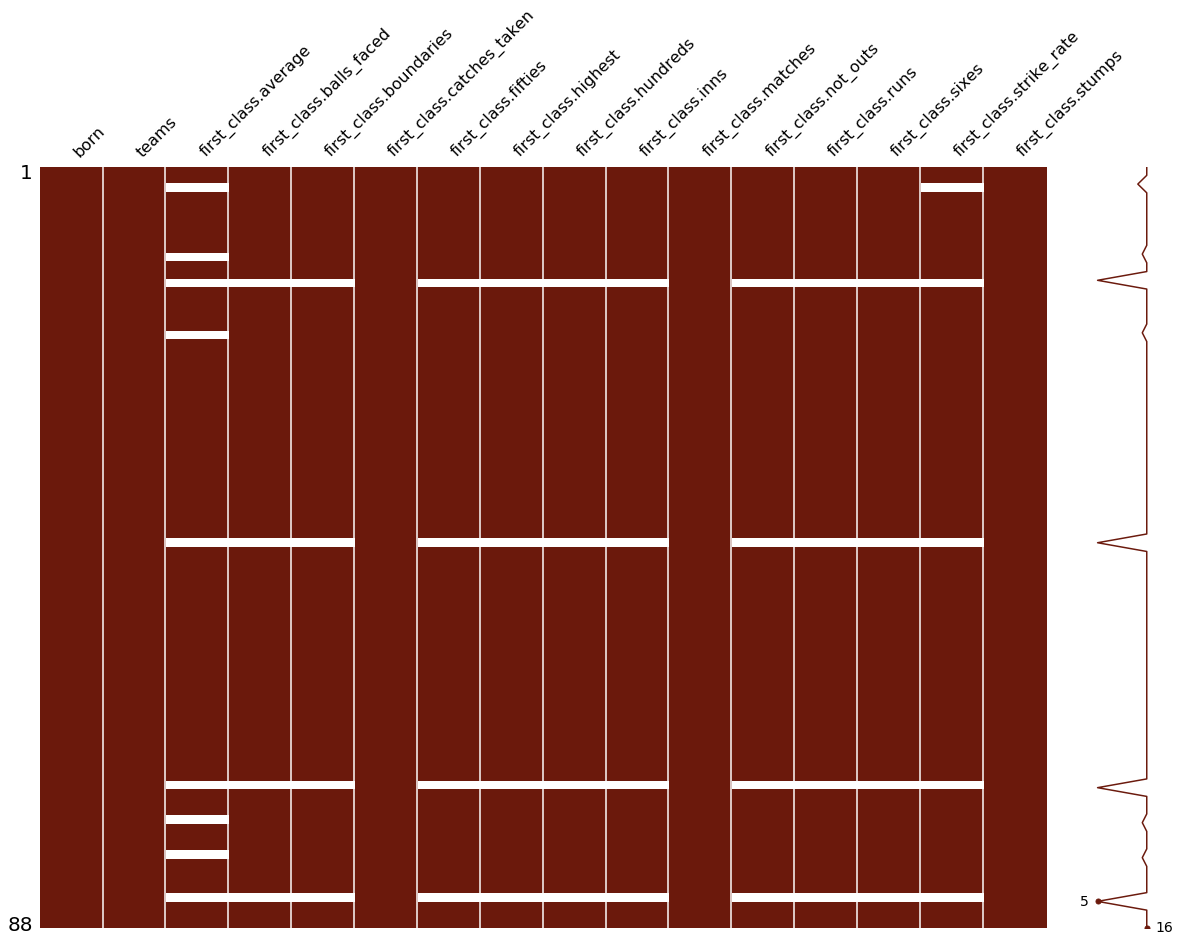

In [7]:
#missingno is a python library for nice visulaisation of missing number in the data
import missingno as msno
# Nullity or missing values by columns
msno.matrix(df=dataCopy.iloc[:,2:39], figsize=(20, 14), color=(0.42, 0.1, 0.05))

# So how many missing datapoints we have

In [8]:
# get the number of missing data points per column
missing_values_count = dataCopy.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:17]

name                         0
url                          0
born                         0
teams                        0
first_class.average          9
first_class.balls_faced      4
first_class.boundaries       4
first_class.catches_taken    0
first_class.fifties          4
first_class.highest          4
first_class.hundreds         4
first_class.inns             4
first_class.matches          0
first_class.not_outs         4
first_class.runs             4
first_class.sixes            4
first_class.strike_rate      5
dtype: int64

## Remove incomplete rows

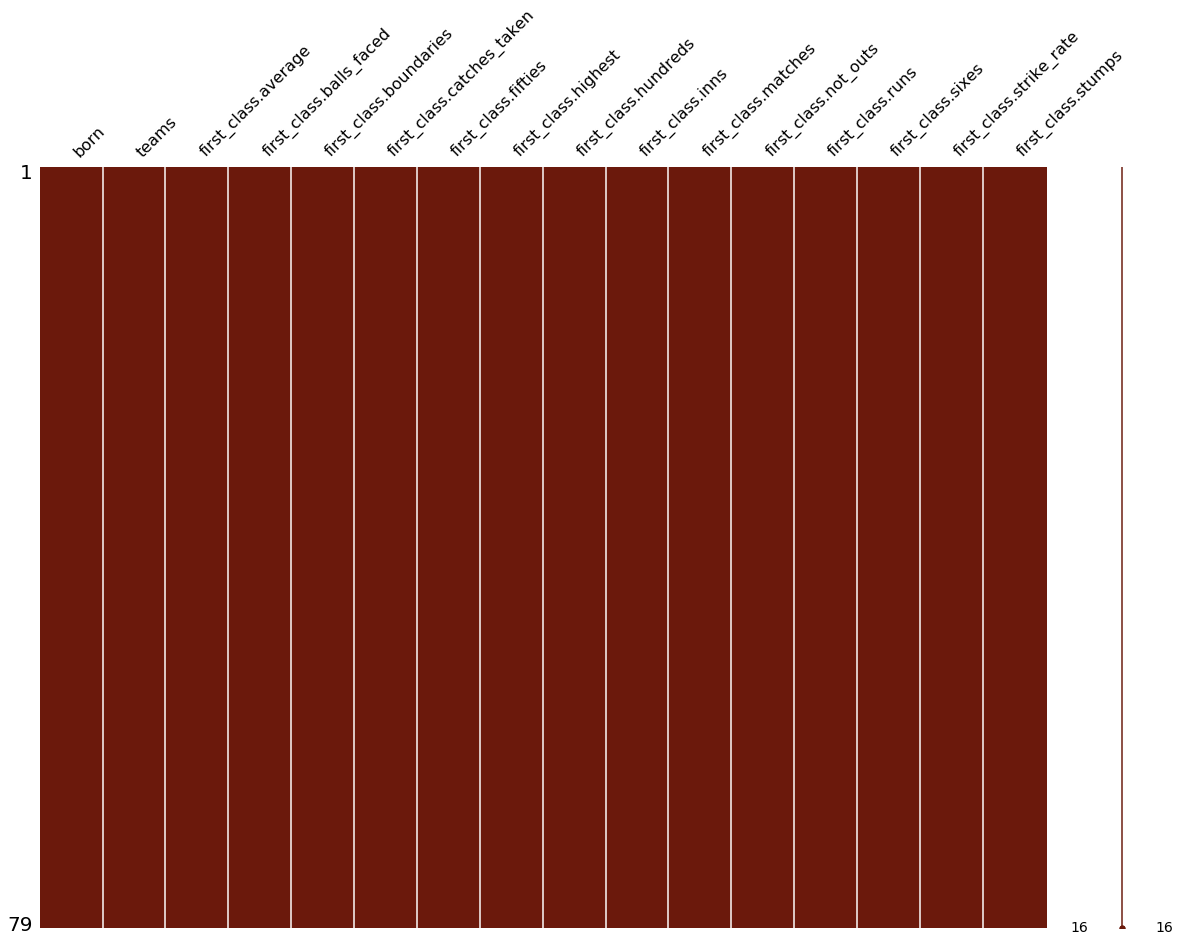

In [9]:
#Dropping all rows with any NA values is easy:
dataCopyDropAll = dataCopy.copy()
dataCopyDropAll.dropna(inplace=True)
msno.matrix(df=dataCopyDropAll.iloc[:,2:39], figsize=(20, 14), color=(0.42, 0.1, 0.05))

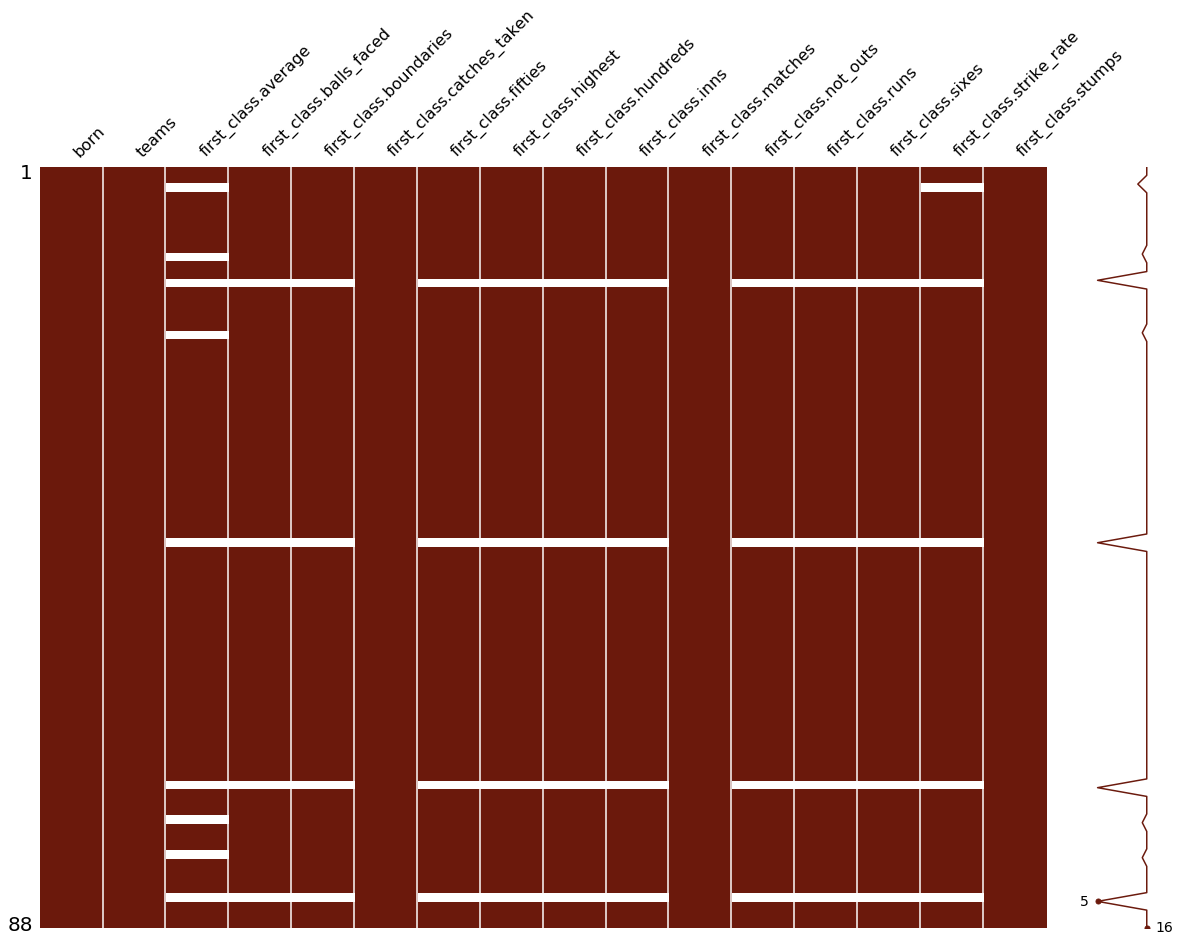

In [10]:
# This might drop a lot of rows which might hamper our analysis
# We can drop rows with all NULLs, thats not the case here
dataCopyDropRowWithAllNA = dataCopy.copy()
dataCopyDropRowWithAllNA.dropna(how='all',inplace=True)
msno.matrix(df=dataCopyDropRowWithAllNA.iloc[:,2:39], figsize=(20, 14), color=(0.42, 0.1, 0.05))

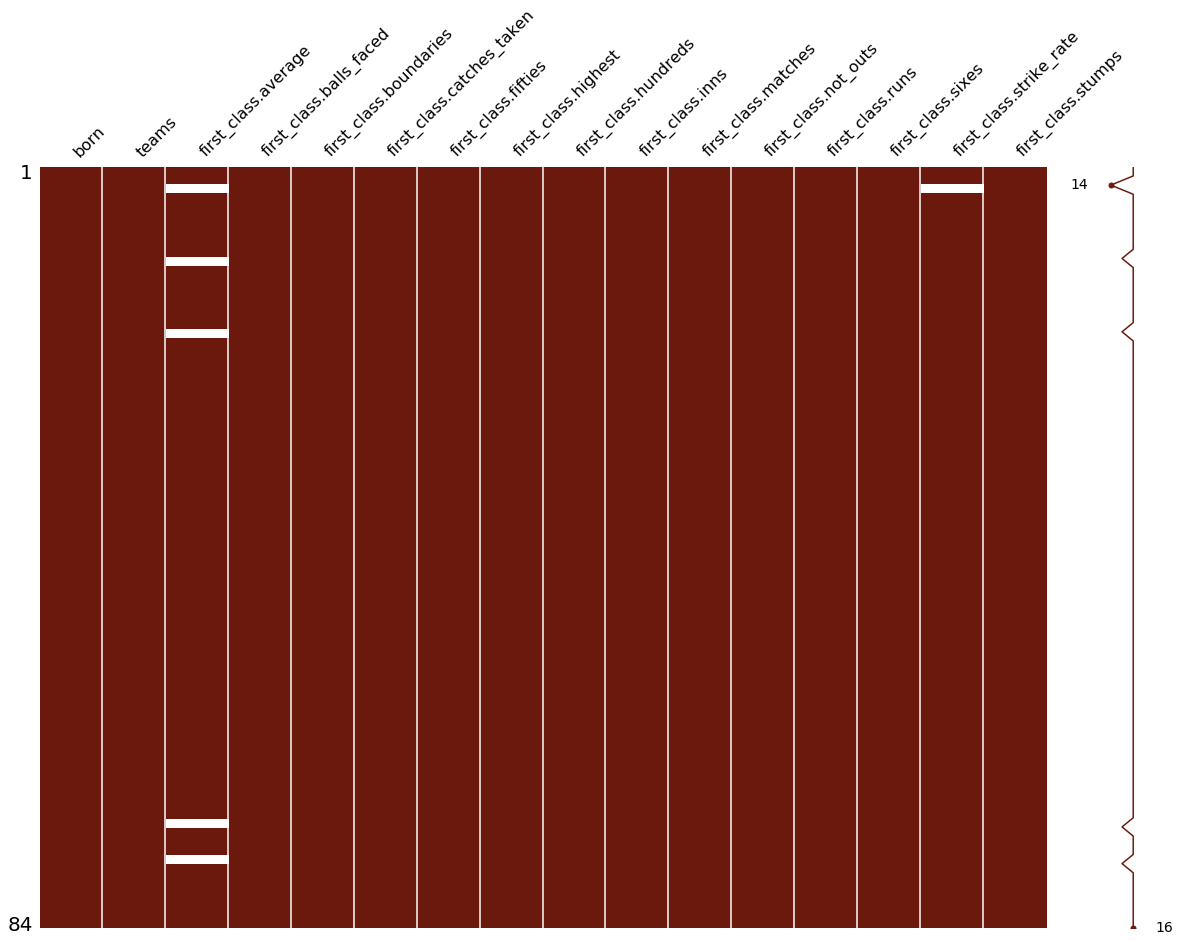

In [11]:
#We also can remove rows with a threshold value 
dataCopyDropRowWithThres = dataCopy.copy()
dataCopyDropRowWithThres.dropna(thresh=10,inplace=True)
msno.matrix(df=dataCopyDropRowWithThres.iloc[:,2:39], figsize=(20, 14), color=(0.42, 0.1, 0.05))

In [12]:
#Sometimes it makes sense to drop 
# Drop the columns with that are all NA values
dataCopyDropColAllNA = dataCopy.copy()
dataCopyDropColAllNA.dropna(axis=1, how='all', inplace=True)

# Drop all columns with any NA values:
dataCopyDropColAnyNA = dataCopy.copy()
dataCopyDropColAnyNA.dropna(axis=1, how='any', inplace=True)

#The threshold thing also can be applied here

## Imputation of missing values

##### This is the point at which we get into the part of data science that I like to call "data intution", by which I mean "really looking at your data and trying to figure out why it is the way it is and how that will affect your analysis". It can be a frustrating part of data science, especially if you're newer to the field and don't have a lot of experience. For dealing with missing values, you'll need to use your intution to figure out why the value is missing. One of the most important question you can ask yourself to help figure this out is this:

Is this value missing becuase it wasn't recorded or becuase it dosen't exist?

If a value is missing becuase it doens't exist (like the height of the oldest child of someone who doesn't have any children) then it doesn't make sense to try and guess what it might be. These values you probalby do want to keep as NaN. On the other hand, if a value is missing becuase it wasn't recorded, then you can try to guess what it might have been based on the other values in that column and row. (This is called "imputation" and we'll learn how to do it next! :)

### Mean, median, mode 
### Frequent values

In [13]:
# A simple imputation to make the nan values 0, but not a good idea always
dataCopyFillNAZero = dataCopy.copy()
dataCopyFillNAZero = dataCopyFillNAZero.fillna(0)
dataCopyFillNAZero.head()

,name,url,born,teams,first_class.average,first_class.balls_faced,first_class.boundaries,first_class.catches_taken,first_class.fifties,first_class.highest,first_class.hundreds,first_class.inns,first_class.matches,first_class.not_outs,first_class.runs,first_class.sixes,first_class.strike_rate,first_class.stumps
0,Abhisek Banerjee,http://www.espncricinfo.com/ci/content/player/...,"May 18, 1984, Durgapur","Bengal,",23.75,122,14,2,1,68,0,4,4,0,95,0,77.86,0
1,Reagan Pinto,http://www.espncricinfo.com/ci/content/player/...,"September 21, 1991, Bombay (now Mumbai), Mahar...",Goa,32.55,2772,159,11,7,154,3,47,31,4,1400,10,50.50,0
2,Anupam Patel,http://www.espncricinfo.com/ci/content/player/...,"May 1, 1985, Jamshedpur, Bihar",Gujarat,0,0,0,0,0,0*,0,1,2,1,0,0,0,0
3,Utkarsh Patel,http://www.espncricinfo.com/ci/content/player/...,"October 11, 1987, Paradi, Gujarat",Baroda,20.75,321,21,3,1,53,0,10,7,2,166,2,51.71,0
4,Penta Rao,http://www.espncricinfo.com/ci/content/player/...,"May 10, 1985, Vishakapatnam",Services,34.50,314,14,0,1,89,0,5,3,1,138,0,43.94,0


In [14]:
# The values can also be replace with mean, media, mode or frquent values in the column
dataCopyFillNAMean = dataCopy.copy()
dataCopyFillNAMean["first_class.average"] = pd.to_numeric(dataCopyFillNAMean["first_class.average"])
dataCopyFillNAMean = dataCopyFillNAMean.fillna(dataCopyFillNAMean.mean())
dataCopyFillNAMean.head()

,name,url,born,teams,first_class.average,first_class.balls_faced,first_class.boundaries,first_class.catches_taken,first_class.fifties,first_class.highest,first_class.hundreds,first_class.inns,first_class.matches,first_class.not_outs,first_class.runs,first_class.sixes,first_class.strike_rate,first_class.stumps
0,Abhisek Banerjee,http://www.espncricinfo.com/ci/content/player/...,"May 18, 1984, Durgapur","Bengal,",23.750000,122,14,2,1,68,0,4,4,0,95,0,77.86,0
1,Reagan Pinto,http://www.espncricinfo.com/ci/content/player/...,"September 21, 1991, Bombay (now Mumbai), Mahar...",Goa,32.550000,2772,159,11,7,154,3,47,31,4,1400,10,50.50,0
2,Anupam Patel,http://www.espncricinfo.com/ci/content/player/...,"May 1, 1985, Jamshedpur, Bihar",Gujarat,18.555823,0,0,0,0,0*,0,1,2,1,0,0,NaN,0
3,Utkarsh Patel,http://www.espncricinfo.com/ci/content/player/...,"October 11, 1987, Paradi, Gujarat",Baroda,20.750000,321,21,3,1,53,0,10,7,2,166,2,51.71,0
4,Penta Rao,http://www.espncricinfo.com/ci/content/player/...,"May 10, 1985, Vishakapatnam",Services,34.500000,314,14,0,1,89,0,5,3,1,138,0,43.94,0


### A simple imputer from sklearn cane be used, Detailed sklearn will be covered in the next module

class sklearn.impute.SimpleImputer(missing_values=nan, strategy=’mean’, fill_value=None, verbose=0, copy=True, add_indicator=False)

missing_values : number, string, np.nan (default) or None
The placeholder for the missing values. All occurrences of missing_values will be imputed.

strategy : string, optional (default=”mean”)
The imputation strategy.

If “mean”, then replace missing values using the mean along each column. Can only be used with numeric data.
If “median”, then replace missing values using the median along each column. Can only be used with numeric data.
If “most_frequent”, then replace missing using the most frequent value along each column. Can be used with strings or numeric data.
If “constant”, then replace missing values with fill_value. Can be used with strings or numeric data.
New in version 0.20: strategy=”constant” for fixed value imputation.

fill_value : string or numerical value, optional (default=None)
When strategy == “constant”, fill_value is used to replace all occurrences of missing_values. If left to the default, fill_value will be 0 when imputing numerical data and “missing_value” for strings or object data types.

erbose : integer, optional (default=0)
Controls the verbosity of the imputer.

copy : boolean, optional (default=True)
If True, a copy of X will be created. If False, imputation will be done in-place whenever possible. Note that, in the following cases, a new copy will always be made, even if copy=False:

If X is not an array of floating values;
If X is encoded as a CSR matrix;
If add_indicator=True.
add_indicator : boolean, optional (default=False)
If True, a MissingIndicator transform will stack onto output of the imputer’s transform. This allows a predictive estimator to account for missingness despite imputation. If a feature has no missing values at fit/train time, the feature won’t appear on the missing indicator even if there are missing values at transform/test time.

In [15]:
from sklearn.impute import SimpleImputer
dataCopyImputation = dataCopy.copy()
my_imputer = SimpleImputer()
dataCopyImputation['first_class.average'] = dataCopyImputation['first_class.average'].astype('float')
dataCopyImputation['first_class.strike_rate'] = dataCopyImputation['first_class.strike_rate'].astype('float')
data_with_imputed_values = my_imputer.fit_transform(dataCopyImputation[['first_class.average','first_class.strike_rate']])



# Predicting Missing values

### KNN is an algorithm that is useful for matching a point with its closest k neighbors in a multi-dimensional space. It can be used for data that are continuous, discrete, ordinal and categorical which makes it particularly useful for dealing with all kind of missing data.

KNN is an algorithm that is useful for matching a point with its closest k neighbors in a multi-dimensional space. It can be used for data that are continuous, discrete, ordinal and categorical which makes it particularly useful for dealing with all kind of missing data.

The assumption behind using KNN for missing values is that a point value can be approximated by the values of the points that are closest to it, based on other variables.

In [ ]:
import knnimpute

### missForest

Nonparametric Missing Value Imputation Using Random Forest
'missForest' is used to impute missing values particularly in the case of mixed-type data. It can be used to impute continuous and/or categorical data including complex interactions and nonlinear relations.

## Noisy data removal

In [16]:
import re
def clean_data(s):
    s = s.replace('u', '')
    s = s.replace('\'', '')
    s = s.upper()
    s = s.replace(',', ' ')
    s = s.replace('[', '')
    s = s.replace(']', '')
    # Isolate punctuation
    s = re.sub(r'([\'\"\.\(\)\!\?\-\\\/\,\$%])', r' \1 ', s)
    # Remove some special characters
    s = re.sub(r'([\;\:\|"Â«\n])', ' ', s)
    return s

In [17]:
import re
dataCopyNoisyData = dataCopy.copy()
dataCopyNoisyData['born_new'] = dataCopyNoisyData['born'].apply(clean_data)
dataCopyNoisyData.head()

,name,url,born,teams,first_class.average,first_class.balls_faced,first_class.boundaries,first_class.catches_taken,first_class.fifties,first_class.highest,first_class.hundreds,first_class.inns,first_class.matches,first_class.not_outs,first_class.runs,first_class.sixes,first_class.strike_rate,first_class.stumps,born_new
0,Abhisek Banerjee,http://www.espncricinfo.com/ci/content/player/...,"May 18, 1984, Durgapur","Bengal,",23.75,122,14,2,1,68,0,4,4,0,95,0,77.86,0,MAY 18 1984 DRGAPR
1,Reagan Pinto,http://www.espncricinfo.com/ci/content/player/...,"September 21, 1991, Bombay (now Mumbai), Mahar...",Goa,32.55,2772,159,11,7,154,3,47,31,4,1400,10,50.50,0,SEPTEMBER 21 1991 BOMBAY ( NOW MMBAI ) MA...
2,Anupam Patel,http://www.espncricinfo.com/ci/content/player/...,"May 1, 1985, Jamshedpur, Bihar",Gujarat,NaN,0,0,0,0,0*,0,1,2,1,0,0,NaN,0,MAY 1 1985 JAMSHEDPR BIHAR
3,Utkarsh Patel,http://www.espncricinfo.com/ci/content/player/...,"October 11, 1987, Paradi, Gujarat",Baroda,20.75,321,21,3,1,53,0,10,7,2,166,2,51.71,0,OCTOBER 11 1987 PARADI GJARAT
4,Penta Rao,http://www.espncricinfo.com/ci/content/player/...,"May 10, 1985, Vishakapatnam",Services,34.50,314,14,0,1,89,0,5,3,1,138,0,43.94,0,MAY 10 1985 VISHAKAPATNAM


# Inconsistent data removal

### Use fuzzy matching to correct inconsistent data entry

I'm going to use the fuzzywuzzy package to help identify which string are closest to each other. This dataset is small enough that we could probably could correct errors by hand, but that approach doesn't scale well. (Would you want to correct a thousand errors by hand? What about ten thousand? Automating things as early as possible is generally a good idea. Plus, it’s fun! :)

Fuzzy matching: The process of automatically finding text strings that are very similar to the target string. In general, a string is considered "closer" to another one the fewer characters you'd need to change if you were transforming one string into another. So "apple" and "snapple" are two changes away from each other (add "s" and "n") while "in" and "on" and one change away (rplace "i" with "o"). You won't always be able to rely on fuzzy matching 100%, but it will usually end up saving you at least a little time.

Fuzzywuzzy returns a ratio given two strings. The closer the ratio is to 100, the smaller the edit distance between the two strings. 

In [18]:
# fuzz is used to compare TWO strings
from fuzzywuzzy import fuzz

# process is used to compare a string to MULTIPLE other strings
from fuzzywuzzy import process

#fuzz.ratio compares the entire string, in order
print(fuzz.ratio("this is a test", "this is a fun"))
#fuzz.partial_ratio compares subsections of the string
print(fuzz.partial_ratio("this is a test", "test a is this"))
#fuzz.token_sort_ratio ignores word order
print(fuzz.token_sort_ratio("fuzzy wuzzy was a bear", "wuzzy fuzzy was a bear"))
print(fuzz.token_sort_ratio("fuzzy was a bear", "fuzzy fuzzy was a bear"))
#fuzz.token_set_ratio ignores duplicate words
print(fuzz.token_set_ratio("fuzzy was a bear", "fuzzy fuzzy was a bear"))


74
57
100
84
100
